In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
tracks = pd.read_csv('data/fma_metadata/tracks.csv')
tracks.shape

(106574, 53)

In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

# MISSING VALUE

In [4]:
#Missing Values Ratio. 
#Data columns with too many missing values are unlikely to carry much useful information. Thus, data columns with a ratio of missing values greater than a given threshold can be removed. The higher the threshold, the more aggressive the reduction.


tracks.isna().sum()


track_id                         0
album_comments                   0
album_date_created            3529
album_date_released          36280
album_engineer               91279
album_favorites                  0
album_id                         0
album_information            23425
album_listens                    0
album_producer               88514
album_tags                       0
album_title                   1025
album_tracks                     0
album_type                    6508
artist_active_year_begin     83863
artist_active_year_end      101199
artist_associated_labels     92303
artist_bio                   35418
artist_comments                  0
artist_date_created            856
artist_favorites                 0
artist_id                        0
artist_latitude              62030
artist_location              36364
artist_longitude             62030
artist_members               59725
artist_name                      0
artist_related_projects      93422
artist_tags         

In [5]:
106574*0.5 #remove all the columns with more than 50% missing values

53287.0

In [6]:
features2remove = ['track_lyricist', 'track_language_code', 'track_information', 'track_genre_top', 'track_date_recorded',
                  'track_composer', 'artist_wikipedia_page', 'artist_related_projects', 'artist_members', 'artist_longitude', 'artist_latitude',
                  'artist_associated_labels', 'artist_active_year_begin', 'artist_active_year_end', 'album_producer', 'album_engineer']
tracks.drop(features2remove, inplace=True, axis=1)

In [7]:
features2remove = ['track_publisher']

tracks.drop(features2remove, inplace=True, axis=1)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   track_id             106574 non-null  int64 
 1   album_comments       106574 non-null  int64 
 2   album_date_created   103045 non-null  object
 3   album_date_released  70294 non-null   object
 4   album_favorites      106574 non-null  int64 
 5   album_id             106574 non-null  int64 
 6   album_information    83149 non-null   object
 7   album_listens        106574 non-null  int64 
 8   album_tags           106574 non-null  object
 9   album_title          105549 non-null  object
 10  album_tracks         106574 non-null  int64 
 11  album_type           100066 non-null  object
 12  artist_bio           71156 non-null   object
 13  artist_comments      106574 non-null  int64 
 14  artist_date_created  105718 non-null  object
 15  artist_favorites     106574 non-nu

In [8]:
tracks.isna().sum()

track_id                   0
album_comments             0
album_date_created      3529
album_date_released    36280
album_favorites            0
album_id                   0
album_information      23425
album_listens              0
album_tags                 0
album_title             1025
album_tracks               0
album_type              6508
artist_bio             35418
artist_comments            0
artist_date_created      856
artist_favorites           0
artist_id                  0
artist_location        36364
artist_name                0
artist_tags                0
artist_website         27318
set_split                  0
set_subset                 0
track_bit_rate             0
track_comments             0
track_date_created         0
track_duration             0
track_favorites            0
track_genres               0
track_genres_all           0
track_interest             0
track_license             87
track_listens              0
track_number               0
track_tags    

In [9]:
tracks['album_date_released'] = tracks['album_date_released'].fillna(tracks['album_date_released'].mode()[0])
tracks['album_information'] = tracks['album_information'].fillna(tracks['album_information'].mode()[0])

tracks['artist_bio'] = tracks['artist_bio'].fillna(tracks['artist_bio'].mode()[0])

tracks['artist_location'] = tracks['artist_location'].fillna(tracks['artist_location'].mode()[0])
tracks['artist_website'] = tracks['artist_website'].fillna(tracks['artist_website'].mode()[0])

tracks.isna().sum()


track_id                  0
album_comments            0
album_date_created     3529
album_date_released       0
album_favorites           0
album_id                  0
album_information         0
album_listens             0
album_tags                0
album_title            1025
album_tracks              0
album_type             6508
artist_bio                0
artist_comments           0
artist_date_created     856
artist_favorites          0
artist_id                 0
artist_location           0
artist_name               0
artist_tags               0
artist_website            0
set_split                 0
set_subset                0
track_bit_rate            0
track_comments            0
track_date_created        0
track_duration            0
track_favorites           0
track_genres              0
track_genres_all          0
track_interest            0
track_license            87
track_listens             0
track_number              0
track_tags                0
track_title         

In [10]:
# Drop any row that contains missing values
#threshold 6508

tracks.dropna(inplace=True)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   track_id             99404 non-null  int64 
 1   album_comments       99404 non-null  int64 
 2   album_date_created   99404 non-null  object
 3   album_date_released  99404 non-null  object
 4   album_favorites      99404 non-null  int64 
 5   album_id             99404 non-null  int64 
 6   album_information    99404 non-null  object
 7   album_listens        99404 non-null  int64 
 8   album_tags           99404 non-null  object
 9   album_title          99404 non-null  object
 10  album_tracks         99404 non-null  int64 
 11  album_type           99404 non-null  object
 12  artist_bio           99404 non-null  object
 13  artist_comments      99404 non-null  int64 
 14  artist_date_created  99404 non-null  object
 15  artist_favorites     99404 non-null  int64 
 16  art

In [11]:
tracks.shape

(99404, 36)

# REDUNDANT FEATURES

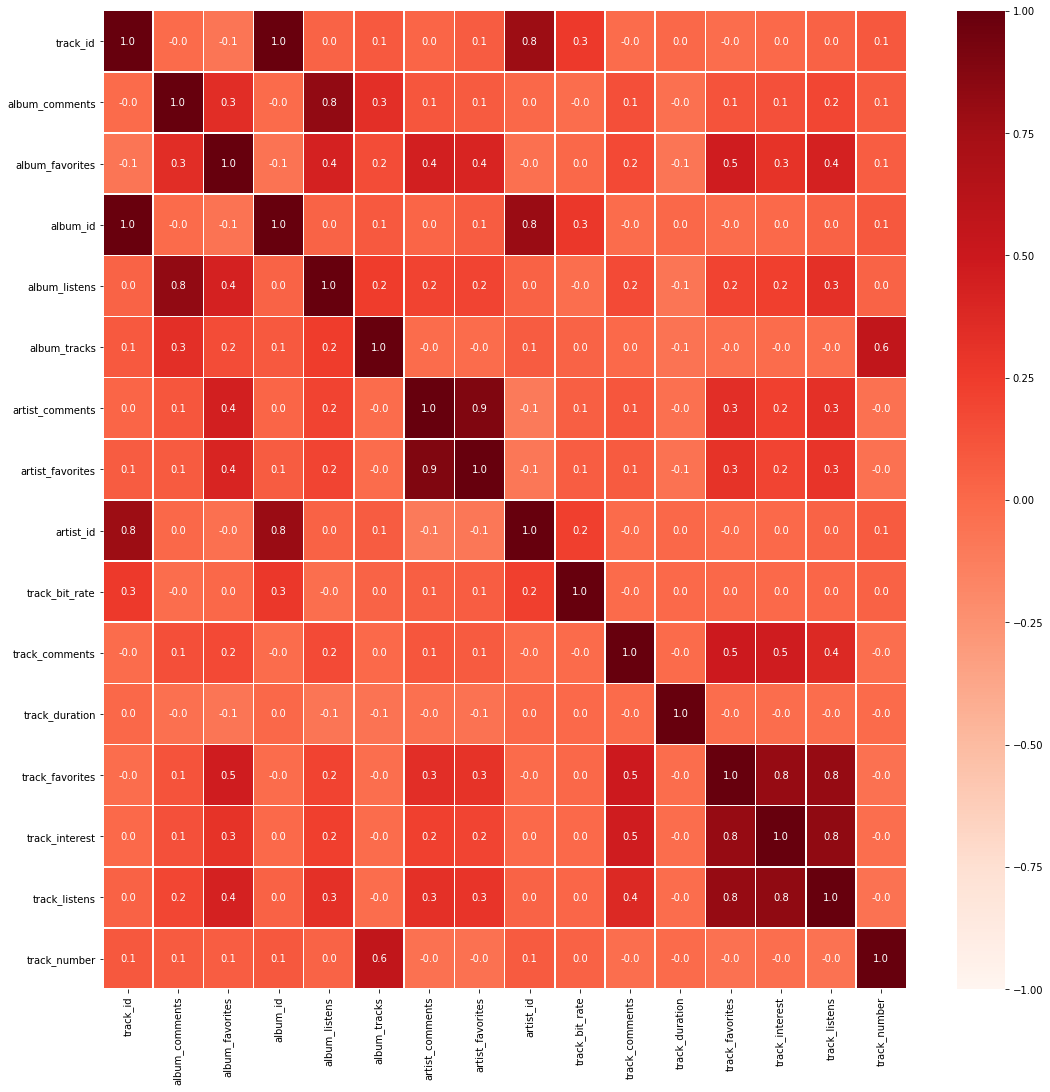

In [12]:
f,ax = plt.subplots(figsize=(18,18)) #Display a heatmap of the correlation matrix
sns.heatmap(tracks.corr(), annot=True, cmap="Reds", linewidths=0.5, linecolor="white", fmt=".1f", vmin=-1.0, vmax=1.0, ax=ax)
plt.show()

In [36]:
#remove if correlation higher or equal than 0.6 - redundants

columns2remove = ['track_id', 'track_number', 'album_listens',
                  'track_listens', 'artist_favorites']

# Create correlation matrix
corr_matrix = tracks.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.6)]

# Drop features 
tracks.drop(to_drop, axis=1, inplace=True)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_comments                                           99404 non-null  int64
 2   album_favorites                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int32
 4   album_tags                                               99404 non-null  int32
 5   album_title                                              99404 non-null  int32
 6   album_tracks                                             99404 non-null  int64
 7   album_type                                               99404 non-null  int32
 8   artist_bio                                   

# DATA TRASFORMATION

In [14]:
#Parse the attribute 'album_date_created' to datetime
tracks['album_date_created'] = pd.to_datetime(tracks['album_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['album_date_created_year'] = tracks['album_date_created'].dt.year
tracks['album_date_created_month'] = tracks['album_date_created'].dt.month
tracks['album_date_created_day'] = tracks['album_date_created'].dt.day

def daytime(h):
    if 6 <= h < 13:
        return 'morning'
    elif 13 <= h < 18:
        return 'afternoon'
    elif 18 <= h < 22:
        return 'evening'
    return 'night'

tracks['album_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['album_date_created'])]

In [15]:
#Parse the attribute 'album_date_released' to datetime
tracks['album_date_released'] = pd.to_datetime(tracks['album_date_released'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['album_date_released_year'] = tracks['album_date_released'].dt.year
tracks['album_date_released_month'] = tracks['album_date_released'].dt.month
tracks['album_date_released_day'] = tracks['album_date_released'].dt.day

tracks['album_date_released_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['album_date_released'])]

In [16]:
#Parse the attribute 'artist_date_created' to datetime
tracks['artist_date_created'] = pd.to_datetime(tracks['artist_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['artist_date_created_year'] = tracks['artist_date_created'].dt.year
tracks['artist_date_created_month'] = tracks['artist_date_created'].dt.month
tracks['artist_date_created_day'] = tracks['artist_date_created'].dt.day

tracks['artist_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['artist_date_created'])]

In [17]:
#Parse the attribute 'track_date_created' to datetime
tracks['track_date_created'] = pd.to_datetime(tracks['track_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['track_date_created_year'] = tracks['track_date_created'].dt.year
tracks['track_date_created_month'] = tracks['track_date_created'].dt.month
tracks['track_date_created_day'] = tracks['track_date_created'].dt.day

tracks['track_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['track_date_created'])]

In [18]:
#Remove the original datetime attributes
dtattributes2remove = ['album_date_created', 'album_date_released', 'artist_date_created', 'track_date_created']

tracks.drop(dtattributes2remove, inplace=True, axis=1)

In [19]:
tracks.head()

,track_id,album_comments,album_favorites,album_information,album_tags,album_title,album_tracks,album_type,artist_bio,artist_comments,...,album_date_released_day,album_date_released_daytime,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime
0,2,0,4,<p></p>,[],AWOL - A Way Of Life,7,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,...,5,night,2008,11,26,night,2008,11,26,night
1,3,0,4,<p></p>,[],AWOL - A Way Of Life,7,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,...,5,night,2008,11,26,night,2008,11,26,night
2,5,0,4,<p></p>,[],AWOL - A Way Of Life,7,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,...,5,night,2008,11,26,night,2008,11,26,night
3,10,0,4,"<p class=""p1"" style=""margin: 0px; padding: 8px...",[],Constant Hitmaker,2,Album,"<p><span style=""font-family:Verdana, Geneva, A...",3,...,6,night,2008,11,26,night,2008,11,25,afternoon
4,20,0,2,"<p> ""spiritual songs"" from Nicky Cook</p>",[],Niris,13,Album,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,...,6,night,2008,11,26,night,2008,11,26,night


In [20]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   track_id                     99404 non-null  int64 
 1   album_comments               99404 non-null  int64 
 2   album_favorites              99404 non-null  int64 
 3   album_information            99404 non-null  object
 4   album_tags                   99404 non-null  object
 5   album_title                  99404 non-null  object
 6   album_tracks                 99404 non-null  int64 
 7   album_type                   99404 non-null  object
 8   artist_bio                   99404 non-null  object
 9   artist_comments              99404 non-null  int64 
 10  artist_location              99404 non-null  object
 11  artist_name                  99404 non-null  object
 12  artist_tags                  99404 non-null  object
 13  artist_website               9

# TARGET VARIABLE

In [21]:
tracks['track_license'].value_counts()

Attribution-Noncommercial-Share Alike 3.0 United States                          17680
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International    17001
Attribution-NonCommercial-ShareAlike 3.0 International                           14874
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                     11304
Attribution-Noncommercial-No Derivative Works 3.0 United States                  10308
                                                                                 ...  
Attribution 2.5 Italy                                                                1
Attribution-Noncommercial-No Derivative Works 2.5 Sweden                             1
Attribution-Noncommercial 2.5 Canada                                                 1
Attribution-Noncommercial 3.0 Austria                                                1
Electronic Frontier Foundation Open Audio License                                    1
Name: track_license, Length: 111, dtype: in

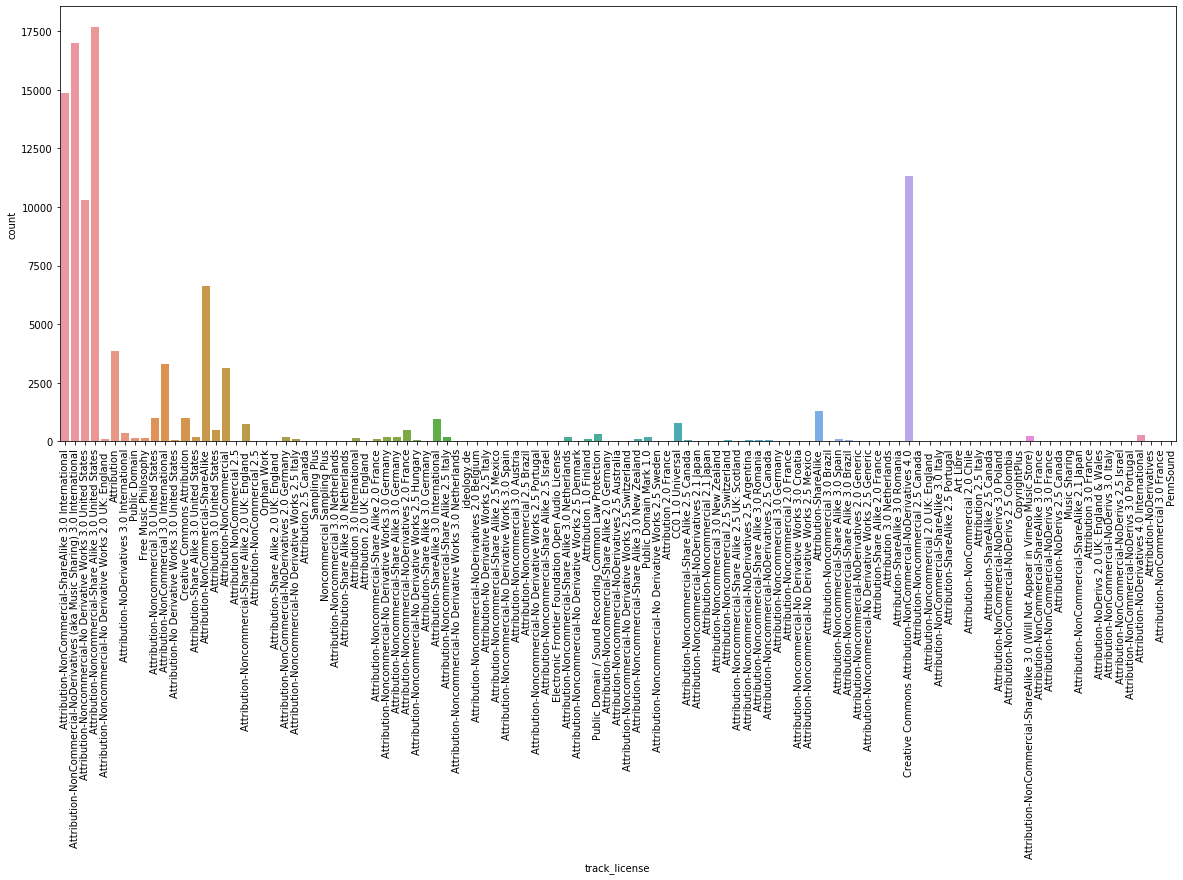

In [22]:
# Variable distribution
plt.subplots(figsize=(20,8))

sns.countplot(x='track_license', data=tracks)
plt.xticks(rotation=90)
plt.show()

In [23]:
values2modify = list(tracks['track_license'].unique())
values2modify.remove('Attribution-Noncommercial-Share Alike 3.0 United States')

In [24]:
tracks['Attribution-Noncommercial-Share Alike 3.0 United States'] = tracks['track_license']

class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'

tracks[class_name] = tracks[class_name].replace(class_name, 1)

for value in values2modify:
        tracks[class_name] = tracks[class_name].replace(value, 0)


In [25]:
tracks[class_name].value_counts()

0    81724
1    17680
Name: Attribution-Noncommercial-Share Alike 3.0 United States, dtype: int64

In [26]:
print((17680/(81724+17680))*100)
print((81724/(81724+17680))*100)

17.78600458734055
82.21399541265944


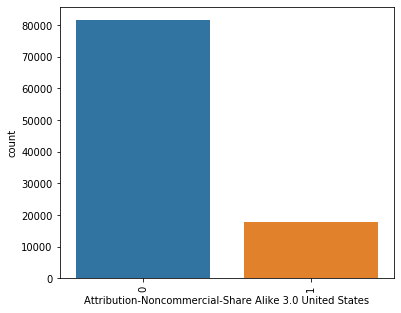

In [27]:
plt.subplots(figsize=(6,5))

sns.countplot(x=class_name, data=tracks)
plt.xticks(rotation=90)
plt.show()

In [28]:
tracks.drop('track_license', axis=1, inplace=True)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   track_id                                                 99404 non-null  int64 
 1   album_comments                                           99404 non-null  int64 
 2   album_favorites                                          99404 non-null  int64 
 3   album_information                                        99404 non-null  object
 4   album_tags                                               99404 non-null  object
 5   album_title                                              99404 non-null  object
 6   album_tracks                                             99404 non-null  int64 
 7   album_type                                               99404 non-null  object
 8   artist_bio                         

# TRASFORMATION OF THE FEATURES

In [29]:
#Transform categorical features into numerical features using label encoding
from sklearn.preprocessing import LabelEncoder #LabelEncoder is imported and used to transform the features

label_encoder = LabelEncoder()

features2encode = ['track_date_created_daytime', 'artist_date_created_daytime', 'album_date_released_daytime', 'album_date_created_daytime', 
                  'track_title', 'track_tags', 'track_genres_all', 'track_genres', 'set_subset', 'set_split', 'artist_website',
                  'artist_tags', 'artist_name', 'artist_location', 'artist_bio', 'album_type', 'album_title', 'album_tags',
                  'album_information']
        
for feature in features2encode: #Transformation applied for each categorical attribute in df
    tracks[feature] = label_encoder.fit_transform(tracks[feature])

In [30]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_comments                                           99404 non-null  int64
 2   album_favorites                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int32
 4   album_tags                                               99404 non-null  int32
 5   album_title                                              99404 non-null  int32
 6   album_tracks                                             99404 non-null  int64
 7   album_type                                               99404 non-null  int32
 8   artist_bio                                   

# MOST IMPORTANT FEATURES 

In [31]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [32]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
attributes = [col for col in tracks.columns if col != class_name]
numeric = tracks[attributes]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i+1])

In [33]:
from sklearn.ensemble import RandomForestRegressor
X = tracks[attributes].values
y = tracks[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
model = RandomForestRegressor(random_state=1, max_depth=10)
tracks=pd.get_dummies(tracks)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

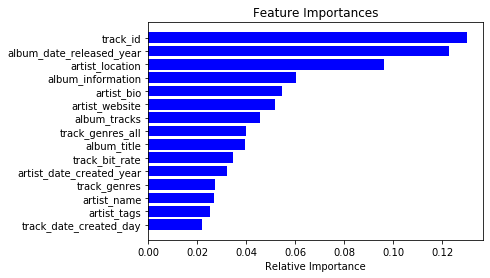

In [34]:
features = tracks.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

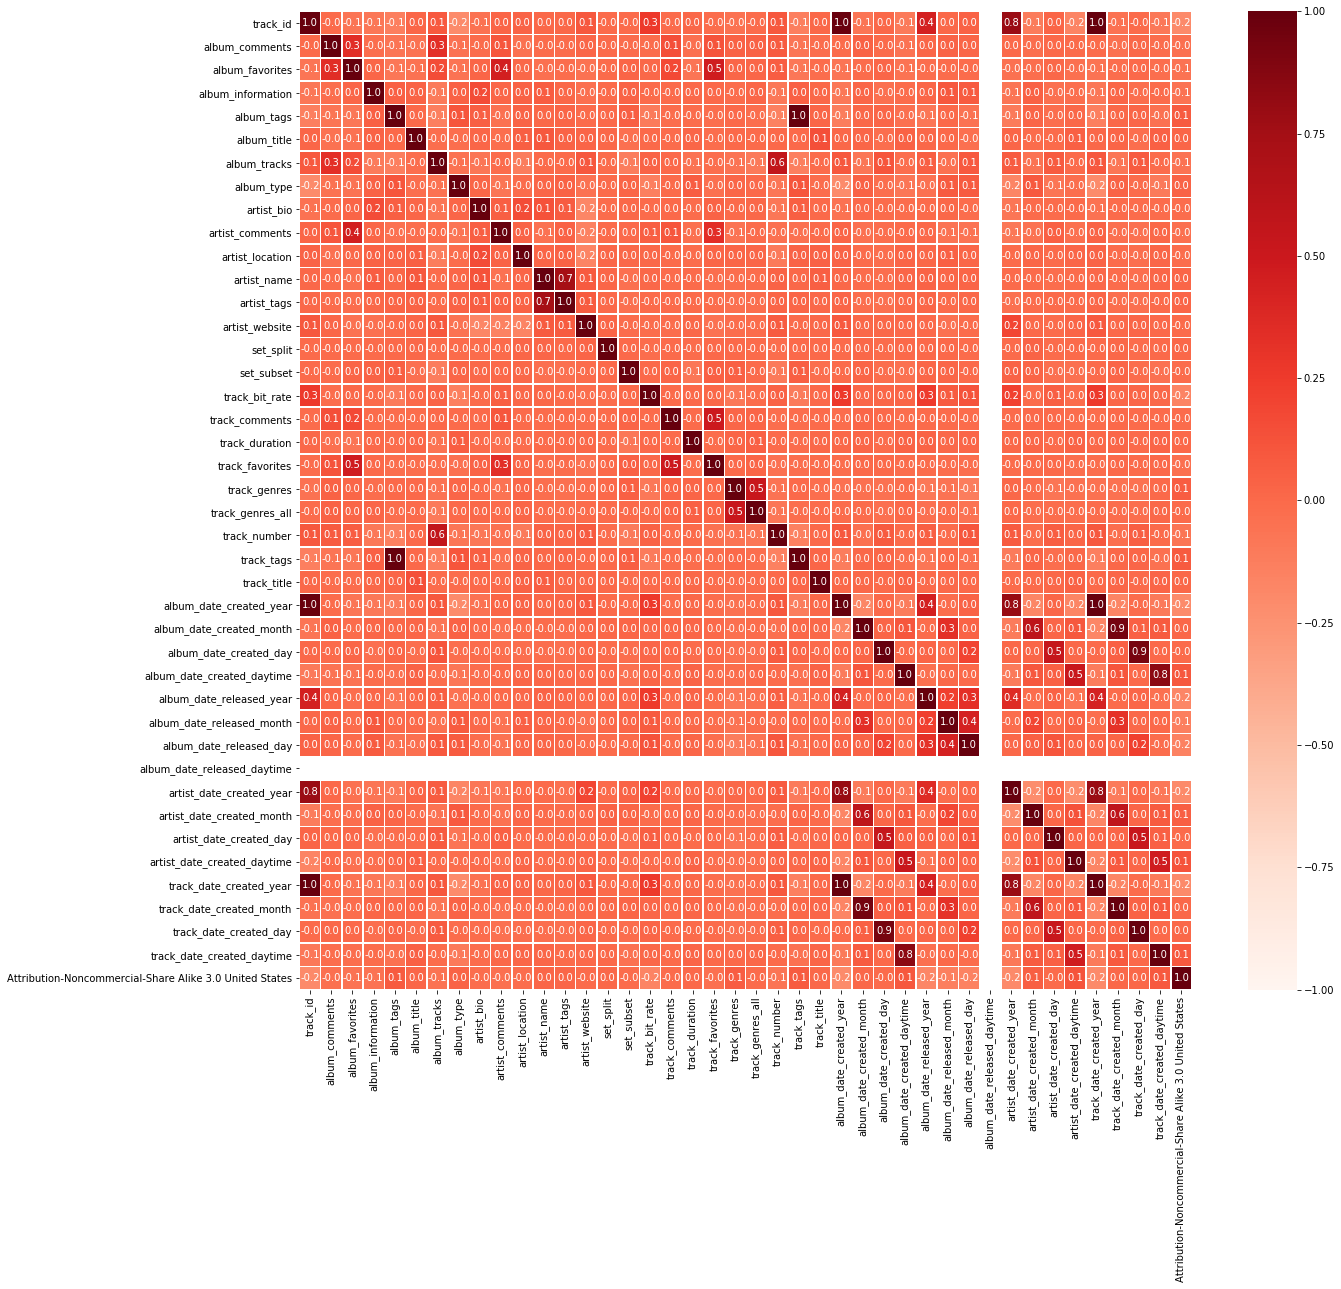

In [35]:
f,ax = plt.subplots(figsize=(20,18)) #Display a heatmap of the correlation matrix
sns.heatmap(tracks.corr(), annot=True, cmap="Reds", linewidths=0.5, linecolor="white", fmt=".1f", vmin=-1.0, vmax=1.0, ax=ax)
plt.show()

In [37]:
tracks['album_date_released_daytime'].value_counts()

0    99404
Name: album_date_released_daytime, dtype: int64

In [42]:
# Create correlation matrix
corr_matrix = tracks.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]

# Drop features 
tracks.drop(to_drop, axis=1, inplace=True)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99404 entries, 0 to 106573
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_comments                                           99404 non-null  int64
 2   album_favorites                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int32
 4   album_tags                                               99404 non-null  int32
 5   album_title                                              99404 non-null  int32
 6   album_tracks                                             99404 non-null  int64
 7   album_type                                               99404 non-null  int32
 8   artist_bio                                   

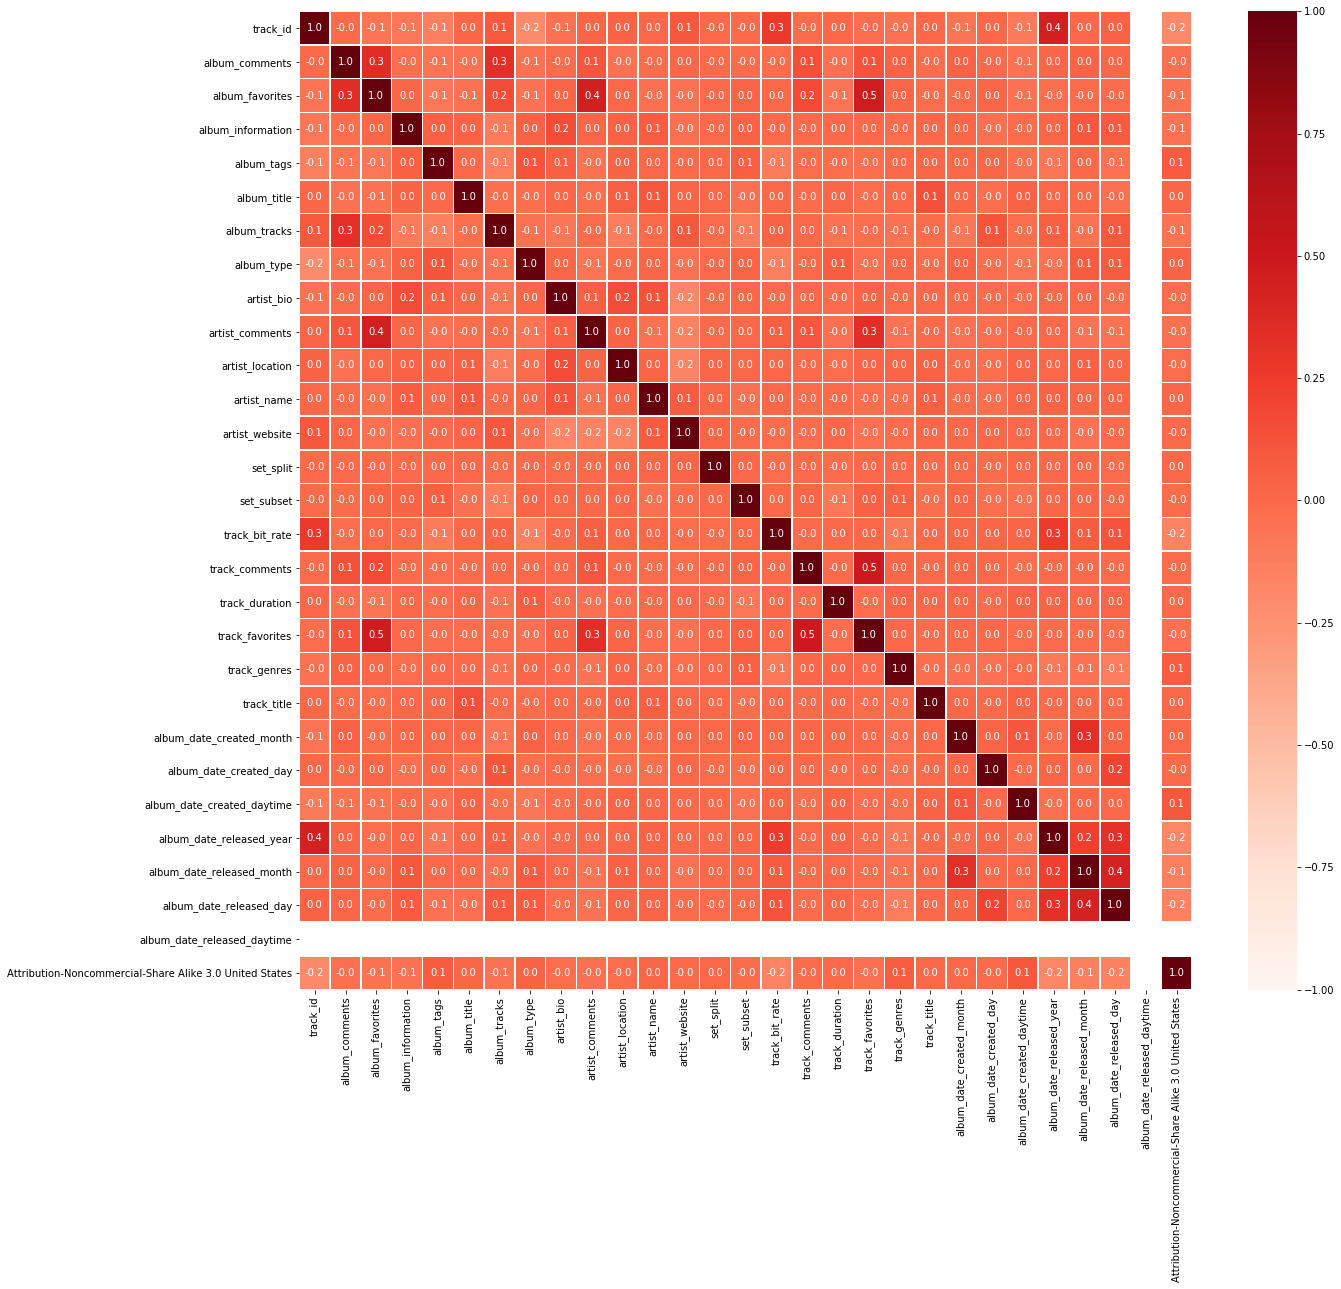

In [43]:
f,ax = plt.subplots(figsize=(20,18)) #Display a heatmap of the correlation matrix
sns.heatmap(tracks.corr(), annot=True, cmap="Reds", linewidths=0.5, linecolor="white", fmt=".1f", vmin=-1.0, vmax=1.0, ax=ax)
plt.show()